Import necessary libraries and loading data related to movies

In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
data=pd.read_csv("C:/Users/hp/Desktop/DS/movie_metadata1.csv")
print(data.shape)
print(data.head)

(5043, 28)
<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                     723       178   
1     Color     Gore Verbinski                     302       169   
2     Color         Sam Mendes                     602       148   
3     Color  Christopher Nolan                     813       164   
4        49        Doug Walker                      49        49   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                       1        87   
5039  Color                 49                      43        43   
5040  Color   Benjamin Roberds                      13        76   
5041  Color        Daniel Hsia                      14       100   
5042  Color           Jon Gunn                      43        90   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                           0                     855  Joel David M

In [3]:
data['director_facebook_likes']

0           0
1         563
2           0
3       22000
4         131
        ...  
5038        2
5039       49
5040        0
5041        0
5042       16
Name: director_facebook_likes, Length: 5043, dtype: int64

In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Taking director fb likes and actor fb likes

In [5]:
newdata=data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


importing kmeans from sklearn

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters=5)

Fit the data

In [8]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [9]:
kmeans.cluster_centers_

array([[  246.00784929,   906.46546311],
       [17623.37662338,  2446.01298701],
       [  358.68604651, 11302.3255814 ],
       [12475.72815534,   563.27184466],
       [  116.90094205,   247.1821296 ]])

In [10]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 4 ... 4 4 4]
5043


In [11]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{np.int32(0): np.int64(1310), np.int32(1): np.int64(77), np.int32(2): np.int64(86), np.int32(3): np.int64(103), np.int32(4): np.int64(3467)}


Plot the data

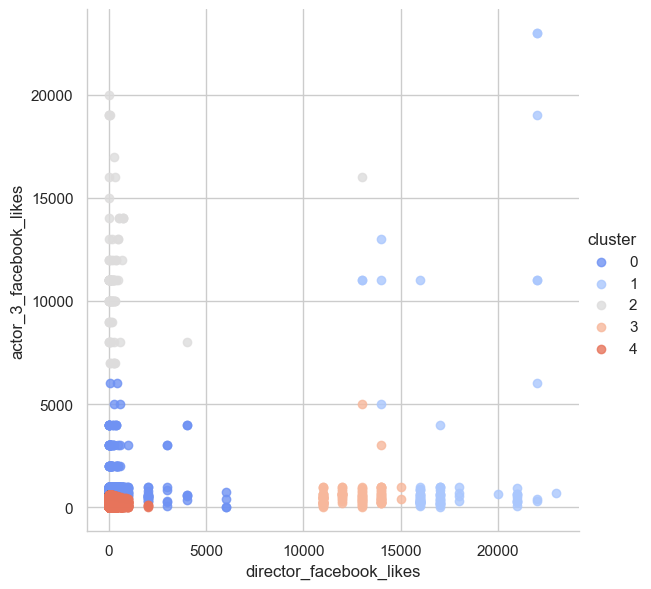

In [13]:
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(
    x='director_facebook_likes',
    y='actor_3_facebook_likes',
    data=newdata,
    hue='cluster',
    palette='coolwarm',
    height=6,
    aspect=1,
    fit_reg=False
)